In [1]:
import numpy as np
import scipy.io.wavfile as wavfile

import matplotlib.pyplot as plt

from sklearn.decomposition import FastICA, PCA

# Cocktail Party Problem
The goal is to unmix the sounds mixed in the audio files.

## 1. Load the files
Take a look at scipy.io.wavfile.read

In [2]:
NB_FILES = 3
files = [ "mixed_{}.wav".format(i) for i in range(1, NB_FILES + 1) ]

In [3]:
sounds = []
for sound_path in files:
    sounds.append(wavfile.read(sound_path))

## 2. Run an ICA
Run an ICA from scikit learn (or your own) on the data

In [4]:
nb_comp = len(sounds)
rate = sounds[0][0]
nb_freq = sounds[0][1].shape[0]
print("Number of sounds: {}".format(nb_comp))
print("Number of frequences: {}".format(nb_freq))

Number of sounds: 3
Number of frequences: 95616


In [5]:
# Builds a unique matrix containing all the music,
# this will contain the independant sources.

X = np.zeros((3, nb_freq))
for s in range(0, len(sounds)):
    X[s] = sounds[s][1]
    
print("X shape: {}".format(X.shape))

X shape: (3, 95616)


In [6]:
ica = FastICA(n_components=nb_comp)
S = ica.fit_transform(X.T)
A = ica.mixing_

print("S shape: {}".format(S.shape))
print("A shape: {}".format(A.shape))

S shape: (95616, 3)
A shape: (3, 3)


## 3. Output the results
Output the wav files. Do the sound good?

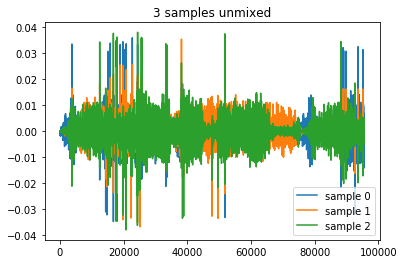

In [7]:
# Plots all the samples
S = S.T

plt.title("{} samples unmixed".format(nb_comp))
for i in range(0, nb_comp):
    plt.plot(S[i], label="sample {}".format(i))
plt.legend()
plt.show()

### Save sounds to disk

In [8]:
try:
    for i in range(0, nb_comp):
        wavfile.write('generated_{}.wav'.format(i), rate, S[i])
except(e):
    print('Failed to write samples to disk.')

* Analysis

We can see that the sounds overlap (which is normal) but they seem really uncorrelated, looking at the graph above makes think the ICA worked well.

Actually, I listened to the output samples, and it effectively worked with very few noise!